In [1]:
from os import path as os_path
from sys import path as sys_path

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

In [ ]:
# U+2010 ‐ HYPHEN
# U+2011 ‑ NON-BREAKING HYPHEN
# U+2212 − MINUS SIGN
# U+2013 – EN DASH
# U+2014 — EM DASH

In [2]:
def create_df_from_csv(subfolder,filename):
	return pd.read_csv(os_path.join(sys_path[0],"DATA",subfolder,f"{filename}.csv"))

In [3]:
def save_df_to_csv(df:"pd.DataFrame",subfolder,filename):
	return df.to_csv(os_path.join(sys_path[0],"DATA",subfolder,f"{filename}.csv"),mode='w')

INDEX COMPOSITION
<br><b>(DATA SOURCE: FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE)</b>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Normalization method:
zi = (xi – min(x)) / (max(x) – min(x)) * 100

In [4]:
def normalize_data(df_column,range):
	s = range[1]-range[0]
	return 100*(df_column-range[0])/s

<b>01. COMMUNICATION</b>
<br>> fixed lines subscribers / 100 people (fixed_line_subscribers_per_100_people.csv)
<br>> cell phones / 100 people (cell_phones_per_100_people.csv)
<br>> broadband subscribers / 100 people (broadband_subscribers_per_100_people.csv)
<br>> personal computers / 100 people (personal_computers_per_100_people.csv)

In [5]:
com = {
	"fixed" : create_df_from_csv("COMMUNICATION","fixed_line_subscribers_per_100_people"),
	"cell" : create_df_from_csv("COMMUNICATION","cell_phones_per_100_people"),
	"broad" : create_df_from_csv("COMMUNICATION","broadband_subscribers_per_100_people"),
	"pcs" : create_df_from_csv("COMMUNICATION","personal_computers_per_100_people")
}

df_com = pd.concat(
	[
		com["fixed"].set_index("country")["2020"].rename("com_fixed_2020"),
		com["cell"].set_index("country")["2020"].rename("com_cell_2020"),
		com["broad"].set_index("country")["2020"].rename("com_broad_2020"),
		com["pcs"].set_index("country")["2005"].rename("com_pcs_2005"),
	],
	axis=1,join='inner'
)

df_com

,com_fixed_2020,com_cell_2020,com_broad_2020,com_pcs_2005
country,,,,
Aruba,32.800,132.0,17.8000,7.97
Afghanistan,0.374,58.2,0.0682,0.28
Angola,0.356,43.8,0.3640,0.59
Albania,7.790,91.4,17.8000,1.73
UAE,25.600,198.0,34.9000,23.40
...,...,...,...,...
Samoa,2.790,32.1,0.7870,1.89
Yemen,3.840,47.0,1.2100,1.91
South Africa,3.570,163.0,2.2200,8.36


In [6]:
# equal component weights:
w_com = [1/len(com)]*len(com)

In [7]:
save_df_to_csv(df_com,"INDEX","df_com")

In [8]:
fixed_range = [df_com["com_fixed_2020"].min(),df_com["com_fixed_2020"].max()]
df_com["com_fixed_2020_n"] = normalize_data(df_com["com_fixed_2020"],fixed_range)
cell_range = [df_com["com_cell_2020"].min(),df_com["com_cell_2020"].max()]
df_com["com_cell_2020_n"] = normalize_data(df_com["com_cell_2020"],cell_range)
broad_range = [df_com["com_broad_2020"].min(),df_com["com_broad_2020"].max()]
df_com["com_broad_2020_n"] = normalize_data(df_com["com_broad_2020"],broad_range)
pcs_range = [df_com["com_pcs_2005"].min(),df_com["com_pcs_2005"].max()]
df_com["com_pcs_2005_n"] = normalize_data(df_com["com_pcs_2005"],pcs_range)

df_com

,com_fixed_2020,com_cell_2020,com_broad_2020,com_pcs_2005,com_fixed_2020_n,com_cell_2020_n,com_broad_2020_n,com_pcs_2005_n
country,,,,,,,,
Aruba,32.800,132.0,17.8000,7.97,27.796610,28.571429,31.504425,8.964817
Afghanistan,0.374,58.2,0.0682,0.28,0.316949,9.811896,0.120708,0.293189
Angola,0.356,43.8,0.3640,0.59,0.301695,6.151500,0.644248,0.642760
Albania,7.790,91.4,17.8000,1.73,6.601695,18.251144,31.504425,1.928281
UAE,25.600,198.0,34.9000,23.40,21.694915,45.348246,61.769912,26.364456
...,...,...,...,...,...,...,...,...
Samoa,2.790,32.1,0.7870,1.89,2.364407,3.177428,1.392920,2.108705
Yemen,3.840,47.0,1.2100,1.91,3.254237,6.964921,2.141593,2.131258
South Africa,3.570,163.0,2.2200,8.36,3.025424,36.451449,3.929204,9.404601


In [9]:
save_df_to_csv(df_com,"INDEX","df_com_n")

In [10]:
df_com["com_s"] = df_com[["com_fixed_2020_n","com_cell_2020_n","com_broad_2020_n","com_pcs_2005_n"]].mul(w_com).sum(axis=1)

df_com

,com_fixed_2020,com_cell_2020,com_broad_2020,com_pcs_2005,com_fixed_2020_n,com_cell_2020_n,com_broad_2020_n,com_pcs_2005_n,com_s
country,,,,,,,,,
Aruba,32.800,132.0,17.8000,7.97,27.796610,28.571429,31.504425,8.964817,24.209320
Afghanistan,0.374,58.2,0.0682,0.28,0.316949,9.811896,0.120708,0.293189,2.635686
Angola,0.356,43.8,0.3640,0.59,0.301695,6.151500,0.644248,0.642760,1.935051
Albania,7.790,91.4,17.8000,1.73,6.601695,18.251144,31.504425,1.928281,14.571386
UAE,25.600,198.0,34.9000,23.40,21.694915,45.348246,61.769912,26.364456,38.794382
...,...,...,...,...,...,...,...,...,...
Samoa,2.790,32.1,0.7870,1.89,2.364407,3.177428,1.392920,2.108705,2.260865
Yemen,3.840,47.0,1.2100,1.91,3.254237,6.964921,2.141593,2.131258,3.623002
South Africa,3.570,163.0,2.2200,8.36,3.025424,36.451449,3.929204,9.404601,13.202669


In [11]:
save_df_to_csv(df_com,"INDEX","df_com_s")

<b>02. EDUCATION</b>
<br>> literacy rate (literacy_rate_adult.csv)
<br>> primary school completion rate (primary_completion_rate_total_percent_of_relevant_age_group.csv)
<br>> females to males literacy ratio (ratio_of_young_literate_females_to_males_percent_ages_15_24.csv)
<br>> govt expenditure per student (expenditure_per_student_primary_percent_of_gdp_per_person.csv)

In [12]:
edu = {
	"adulit" : create_df_from_csv("EDUCATION","literacy_rate_adult"),
	"prim" : create_df_from_csv("EDUCATION","primary_completion_rate_total_percent_of_relevant_age_group"),
	"femalit" : create_df_from_csv("EDUCATION","ratio_of_young_literate_females_to_males_percent_ages_15_24"),
	"exp" : create_df_from_csv("EDUCATION","expenditure_per_student_primary_percent_of_gdp_per_person")
}

df_edu = pd.concat(
	[
		edu["adulit"].set_index("country")["2011"].rename("edu_adulit_2011"),
		edu["prim"].set_index("country")["2020"].rename("edu_prim_2020"),
		edu["femalit"].set_index("country")["2009"].rename("edu_femalit_2009"),
		edu["exp"].set_index("country")["2015"].rename("edu_exp_2015"),
	],
	axis=1,join="inner"
)

df_edu

,edu_adulit_2011,edu_prim_2020,edu_femalit_2009,edu_exp_2015
country,,,,
Aruba,NaN,NaN,100.0,NaN
Afghanistan,39.0,NaN,NaN,10.2
Albania,96.8,99.5,NaN,29.8
UAE,NaN,105.0,NaN,NaN
Argentina,97.9,104.0,100.0,15.6
...,...,...,...,...
Samoa,98.8,102.0,100.0,NaN
Yemen,65.3,NaN,75.5,NaN
South Africa,93.0,95.5,NaN,NaN


In [13]:
# equal component weights:
w_edu = [1/len(edu)]*len(edu)

In [14]:
save_df_to_csv(df_edu,"INDEX","df_edu")

In [15]:
adulit_range = [df_edu["edu_adulit_2011"].min(),df_edu["edu_adulit_2011"].max()]
df_edu["edu_adulit_2011_n"] = normalize_data(df_edu["edu_adulit_2011"],adulit_range)
prim_range = [df_edu["edu_prim_2020"].min(),df_edu["edu_prim_2020"].max()]
df_edu["edu_prim_2020_n"] = normalize_data(df_edu["edu_prim_2020"],prim_range)
femalit_range = [df_edu["edu_femalit_2009"].min(),df_edu["edu_femalit_2009"].max()]
df_edu["edu_femalit_2009_n"] = normalize_data(df_edu["edu_femalit_2009"],femalit_range)
exp_range = [df_edu["edu_exp_2015"].min(),df_edu["edu_exp_2015"].max()]
df_edu["edu_exp_2015_n"] = normalize_data(df_edu["edu_exp_2015"],exp_range)

df_edu

,edu_adulit_2011,edu_prim_2020,edu_femalit_2009,edu_exp_2015,edu_adulit_2011_n,edu_prim_2020_n,edu_femalit_2009_n,edu_exp_2015_n
country,,,,,,,,
Aruba,NaN,NaN,100.0,NaN,NaN,NaN,68.814969,NaN
Afghanistan,39.0,NaN,NaN,10.2,8.433735,NaN,NaN,15.744467
Albania,96.8,99.5,NaN,29.8,95.481928,78.840125,NaN,65.040241
UAE,NaN,105.0,NaN,NaN,NaN,87.460815,NaN,NaN
Argentina,97.9,104.0,100.0,15.6,97.138554,85.893417,68.814969,29.325956
...,...,...,...,...,...,...,...,...
Samoa,98.8,102.0,100.0,NaN,98.493976,82.758621,68.814969,NaN
Yemen,65.3,NaN,75.5,NaN,48.042169,NaN,17.879418,NaN
South Africa,93.0,95.5,NaN,NaN,89.759036,72.570533,NaN,NaN


In [16]:
save_df_to_csv(df_edu,"INDEX","df_edu_n")

In [17]:
df_edu["edu_s"] = df_edu[["edu_adulit_2011_n","edu_prim_2020_n","edu_femalit_2009_n","edu_exp_2015_n"]].mul(w_edu).sum(axis=1)

df_edu

,edu_adulit_2011,edu_prim_2020,edu_femalit_2009,edu_exp_2015,edu_adulit_2011_n,edu_prim_2020_n,edu_femalit_2009_n,edu_exp_2015_n,edu_s
country,,,,,,,,,
Aruba,NaN,NaN,100.0,NaN,NaN,NaN,68.814969,NaN,17.203742
Afghanistan,39.0,NaN,NaN,10.2,8.433735,NaN,NaN,15.744467,6.044550
Albania,96.8,99.5,NaN,29.8,95.481928,78.840125,NaN,65.040241,59.840574
UAE,NaN,105.0,NaN,NaN,NaN,87.460815,NaN,NaN,21.865204
Argentina,97.9,104.0,100.0,15.6,97.138554,85.893417,68.814969,29.325956,70.293224
...,...,...,...,...,...,...,...,...,...
Samoa,98.8,102.0,100.0,NaN,98.493976,82.758621,68.814969,NaN,62.516891
Yemen,65.3,NaN,75.5,NaN,48.042169,NaN,17.879418,NaN,16.480397
South Africa,93.0,95.5,NaN,NaN,89.759036,72.570533,NaN,NaN,40.582392


In [18]:
save_df_to_csv(df_edu,"INDEX","df_edu_s")

<b>03. ECONOMICS</b>
<br>> GDP per capita, as index (gdp_pcap.csv)
<br>> inflation, as index (inflation_annual_percent.csv)
<br>> investments, %GDP (investments_percent_of_gdp.csv)
<br>> trade balance, %GDP (trade_balance_percent_of_gdp.csv)

In [19]:
eco = {
	"gdp" : create_df_from_csv("ECONOMICS","gdp_pcap"),
	"inflation" : create_df_from_csv("ECONOMICS","inflation_annual_percent"),
	"invest" : create_df_from_csv("ECONOMICS","investments_percent_of_gdp"),
	"trade" : create_df_from_csv("ECONOMICS","trade_balance_percent_of_gdp")
}

df_eco = pd.concat(
	[
		eco["gdp"].set_index("country")["2022"].rename("eco_gdp_2022"),
		eco["inflation"].set_index("country")["2022"].rename("eco_inflation_2022"),
		eco["invest"].set_index("country")["2020"].rename("eco_invest_2020"),
		eco["trade"].set_index("country")["2020"].rename("eco_trade_2020"),
	],
	axis=1,join="inner"
)

df_eco

,eco_gdp_2022,eco_inflation_2022,eco_invest_2020,eco_trade_2020
country,,,,
Afghanistan,1430,NaN,11.5,−25.9
Angola,5910,16.3,26.5,10.7
Albania,15.5k,9.87,23.0,−14.5
UAE,74.3k,13.2,22.8,25.3
Argentina,22.4k,69.5,14.4,3.01
...,...,...,...,...
Vanuatu,2790,12.4,46.9,−31.6
Samoa,5120,5.64,33.2,−19.1
South Africa,13.5k,4.76,12.5,4.37


In [20]:
# equal component weights:
w_eco = [1/len(eco)]*len(eco)

In [21]:
save_df_to_csv(df_eco,"INDEX","df_eco")

In [23]:
# originally created csv receives the minus sign as long dash!
# no time to correct error: changed manually, loaded directly
df_eco = pd.read_csv(os_path.join(sys_path[0],"DATA","INDEX",f"df_eco.csv"))

# correction 10.0k > 10000
df_eco["eco_gdp_2022"] = df_eco["eco_gdp_2022"].apply(lambda x : float(x.rstrip(x[-1]))*1000 if (type(x)==str and x[-1]=='k') else x)

# correction all str to float
df_eco = df_eco.set_index("country")
df_eco = df_eco.astype(np.float32)

gdp_range = [df_eco["eco_gdp_2022"].min(),df_eco["eco_gdp_2022"].max()]
df_eco["eco_gdp_2022_n"] = normalize_data(df_eco["eco_gdp_2022"],gdp_range)
inflation_range = [df_eco["eco_inflation_2022"].min(),df_eco["eco_inflation_2022"].max()]
df_eco["eco_inflation_2022_n"] = normalize_data(df_eco["eco_inflation_2022"],inflation_range)
invest_range = [df_eco["eco_invest_2020"].min(),df_eco["eco_invest_2020"].max()]
df_eco["eco_invest_2020_n"] = normalize_data(df_eco["eco_invest_2020"],invest_range)
trade_range = [df_eco["eco_trade_2020"].min(),df_eco["eco_trade_2020"].max()]
df_eco["eco_trade_2020_n"] = normalize_data(df_eco["eco_trade_2020"],trade_range)

df_eco

,eco_gdp_2022,eco_inflation_2022,eco_invest_2020,eco_trade_2020,eco_gdp_2022_n,eco_inflation_2022_n,eco_invest_2020_n,eco_trade_2020_n
country,,,,,,,,
Afghanistan,1430.0,NaN,11.500000,-25.900000,0.903005,NaN,18.860441,43.114910
Angola,5910.0,16.299999,26.500000,10.700000,4.777968,7.707722,45.906960,77.872742
Albania,15500.0,9.870000,23.000000,-14.500000,13.072811,5.321557,39.596107,53.941124
UAE,74300.0,13.200000,22.799999,25.299999,63.931705,6.557316,39.235481,91.737900
Argentina,22400.0,69.500000,14.400000,3.010000,19.040947,27.450180,24.089434,70.569801
...,...,...,...,...,...,...,...,...
Vanuatu,2790.0,12.400000,46.900002,-31.600000,2.079333,6.260437,82.690231,37.701809
Samoa,5120.0,5.640000,33.200001,-19.100000,4.094660,3.751809,57.987740,49.572651
South Africa,13500.0,4.760000,12.500000,4.370000,11.342916,3.425242,20.663542,71.861351


In [24]:
save_df_to_csv(df_eco,"INDEX","df_eco_n")

In [25]:
df_eco["eco_s"] = df_eco[["eco_gdp_2022_n","eco_inflation_2022_n","eco_invest_2020_n","eco_trade_2020_n"]].mul(w_eco).sum(axis=1)

df_eco

,eco_gdp_2022,eco_inflation_2022,eco_invest_2020,eco_trade_2020,eco_gdp_2022_n,eco_inflation_2022_n,eco_invest_2020_n,eco_trade_2020_n,eco_s
country,,,,,,,,,
Afghanistan,1430.0,NaN,11.500000,-25.900000,0.903005,NaN,18.860441,43.114910,15.719589
Angola,5910.0,16.299999,26.500000,10.700000,4.777968,7.707722,45.906960,77.872742,34.066348
Albania,15500.0,9.870000,23.000000,-14.500000,13.072811,5.321557,39.596107,53.941124,27.982900
UAE,74300.0,13.200000,22.799999,25.299999,63.931705,6.557316,39.235481,91.737900,50.365601
Argentina,22400.0,69.500000,14.400000,3.010000,19.040947,27.450180,24.089434,70.569801,35.287591
...,...,...,...,...,...,...,...,...,...
Vanuatu,2790.0,12.400000,46.900002,-31.600000,2.079333,6.260437,82.690231,37.701809,32.182952
Samoa,5120.0,5.640000,33.200001,-19.100000,4.094660,3.751809,57.987740,49.572651,28.851715
South Africa,13500.0,4.760000,12.500000,4.370000,11.342916,3.425242,20.663542,71.861351,26.823263


In [26]:
save_df_to_csv(df_eco,"INDEX","df_eco_s")


<b>04. ENVIRONMENT</b>
<br>> material footprint per capita (matfootp_cap.csv)
<br>> CO2 emissions per capita (co2_pcap_cons.csv)
<br>> levels of water stress (er_h2o_fwst_zs.csv)
<br>> sustainable development index (sdi.csv)

In [27]:
env = {
	"foot" : create_df_from_csv("ENVIRONMENT","matfootp_cap"),
	"co2" : create_df_from_csv("ENVIRONMENT","co2_pcap_cons"),
	"water" : create_df_from_csv("ENVIRONMENT","er_h2o_fwst_zs"),
	"sdi" : create_df_from_csv("ENVIRONMENT","sdi")
}

df_env = pd.concat(
	[
		env["foot"].set_index("country")["2019"].rename("env_foot_2022"),
		env["co2"].set_index("country")["2022"].rename("env_co2_2022"),
		env["water"].set_index("country")["2020"].rename("env_water_2020"),
		env["sdi"].set_index("country")["2019"].rename("env_sdi_2019"),
	],
	axis=1,join="inner"
)

df_env

,env_foot_2022,env_co2_2022,env_water_2020,env_sdi_2019
country,,,,
Afghanistan,1.38,0.284,54.80,55.1
Angola,2.18,1.230,1.87,62.6
Albania,13.00,2.100,4.72,82.6
UAE,69.00,21.100,1590.00,11.0
Argentina,15.80,3.850,10.50,77.7
...,...,...,...,...
Vietnam,8.52,2.170,18.10,72.9
Yemen,2.89,0.395,170.00,50.6
South Africa,7.55,5.180,65.00,69.0


In [28]:
# equal component weights:
w_env = [1/len(env)]*len(env)

In [29]:
save_df_to_csv(df_env,"INDEX","df_env")

In [30]:
# material footprint: lower = better > inverted after normalization
foot_range = [df_env["env_foot_2022"].min(),df_env["env_foot_2022"].max()]
df_env["env_foot_2022_n"] = 100 - normalize_data(df_env["env_foot_2022"],foot_range)
# co2 emissions: lower = better > inverted after normalization
co2_range = [df_env["env_co2_2022"].min(),df_env["env_co2_2022"].max()]
df_env["env_co2_2022_n"] = 100 - normalize_data(df_env["env_co2_2022"],co2_range)
# water stress: lower = better > inverted after normalization
water_range = [df_env["env_water_2020"].min(),df_env["env_water_2020"].max()]
df_env["env_water_2020_n"] = 100 - normalize_data(df_env["env_water_2020"],water_range)
# sustainable development: no need to invert
sdi_range = [df_env["env_sdi_2019"].min(),df_env["env_sdi_2019"].max()]
df_env["env_sdi_2019_n"] = normalize_data(df_env["env_sdi_2019"],sdi_range)

df_env

,env_foot_2022,env_co2_2022,env_water_2020,env_sdi_2019,env_foot_2022_n,env_co2_2022_n,env_water_2020_n,env_sdi_2019_n
country,,,,,,,,
Afghanistan,1.38,0.284,54.80,55.1,98.932301,99.054044,98.577325,60.981912
Angola,2.18,1.230,1.87,62.6,97.993664,95.585539,99.952140,70.671835
Albania,13.00,2.100,4.72,82.6,85.298604,92.395688,99.878113,96.511628
UAE,69.00,21.100,1590.00,11.0,19.594040,22.732272,58.701716,4.005168
Argentina,15.80,3.850,10.50,77.7,82.013376,85.979321,99.727982,90.180879
...,...,...,...,...,...,...,...,...
Vietnam,8.52,2.170,18.10,72.9,90.554969,92.139034,99.530578,83.979328
Yemen,2.89,0.395,170.00,50.6,97.160624,98.647063,95.585096,55.167959
South Africa,7.55,5.180,65.00,69.0,91.693066,81.102882,98.312388,78.940568


In [31]:
save_df_to_csv(df_env,"INDEX","df_env_n")

In [32]:
df_env["env_s"] = df_env[["env_foot_2022_n","env_co2_2022_n","env_water_2020_n","env_sdi_2019_n"]].mul(w_env).sum(axis=1)

df_env

,env_foot_2022,env_co2_2022,env_water_2020,env_sdi_2019,env_foot_2022_n,env_co2_2022_n,env_water_2020_n,env_sdi_2019_n,env_s
country,,,,,,,,,
Afghanistan,1.38,0.284,54.80,55.1,98.932301,99.054044,98.577325,60.981912,89.386396
Angola,2.18,1.230,1.87,62.6,97.993664,95.585539,99.952140,70.671835,91.050795
Albania,13.00,2.100,4.72,82.6,85.298604,92.395688,99.878113,96.511628,93.521008
UAE,69.00,21.100,1590.00,11.0,19.594040,22.732272,58.701716,4.005168,26.258299
Argentina,15.80,3.850,10.50,77.7,82.013376,85.979321,99.727982,90.180879,89.475389
...,...,...,...,...,...,...,...,...,...
Vietnam,8.52,2.170,18.10,72.9,90.554969,92.139034,99.530578,83.979328,91.550977
Yemen,2.89,0.395,170.00,50.6,97.160624,98.647063,95.585096,55.167959,86.640185
South Africa,7.55,5.180,65.00,69.0,91.693066,81.102882,98.312388,78.940568,87.512226


In [33]:
save_df_to_csv(df_env,"INDEX","df_env_s")

<b>05. INFRASTRUCTURE</b>
<br>> 4-wheeled vehicels / 1000 people (cars_trucks_and_buses_per_1000_persons.csv)
<br>> access to electricity, % pop (eg_elc_accs_zs.csv)
<br>> access to sanitation, % pop (at_least_basic_sanitation_overall_access_percent.csv)
<br>> access to water source, % pop (at_least_basic_water_source_overall_access_percent.csv)

In [34]:
infra = {
	"vehicles" : create_df_from_csv("INFRASTRUCTURE","cars_trucks_and_buses_per_1000_persons"),
	"elec" : create_df_from_csv("INFRASTRUCTURE","eg_elc_accs_zs"),
	"sanit" : create_df_from_csv("INFRASTRUCTURE","at_least_basic_sanitation_overall_access_percent"),
	"water" : create_df_from_csv("INFRASTRUCTURE","at_least_basic_water_source_overall_access_percent")
}

df_infra = pd.concat(
	[
		infra["vehicles"].set_index("country")["2007"].rename("infra_vehicles_2007"),
		infra["elec"].set_index("country")["2021"].rename("infra_elec_2021"),
		infra["sanit"].set_index("country")["2016"].rename("infra_sanit_2016"),
		infra["water"].set_index("country")["2016"].rename("infra_water_2016"),
	],
	axis=1,join="inner"
)

df_infra

,infra_vehicles_2007,infra_elec_2021,infra_sanit_2016,infra_water_2016
country,,,,
Afghanistan,22.8,97.7,45.7,65.2
Angola,39.6,48.2,48.6,55.1
Albania,102.0,100.0,98.1,93.8
UAE,313.0,100.0,99.1,100.0
Argentina,314.0,100.0,94.8,99.0
...,...,...,...,...
Samoa,NaN,98.3,95.8,93.3
Yemen,34.8,74.9,52.1,56.8
South Africa,159.0,89.3,73.1,92.2


In [35]:
# equal component weights:
w_infra = [1/len(infra)]*len(infra)

In [36]:
save_df_to_csv(df_infra,"INDEX","df_infra")

In [37]:
vehicles_range = [df_infra["infra_vehicles_2007"].min(),df_infra["infra_vehicles_2007"].max()]
df_infra["infra_vehicles_2007_n"] = normalize_data(df_infra["infra_vehicles_2007"],vehicles_range)
elec_range = [df_infra["infra_elec_2021"].min(),df_infra["infra_elec_2021"].max()]
df_infra["infra_elec_2021_n"] = normalize_data(df_infra["infra_elec_2021"],elec_range)
sanit_range = [df_infra["infra_sanit_2016"].min(),df_infra["infra_sanit_2016"].max()]
df_infra["infra_sanit_2016_n"] = normalize_data(df_infra["infra_sanit_2016"],sanit_range)
water_range = [df_infra["infra_water_2016"].min(),df_infra["infra_water_2016"].max()]
df_infra["infra_water_2016_n"] = normalize_data(df_infra["infra_water_2016"],water_range)

df_infra

,infra_vehicles_2007,infra_elec_2021,infra_sanit_2016,infra_water_2016,infra_vehicles_2007_n,infra_elec_2021_n,infra_sanit_2016_n,infra_water_2016_n
country,,,,,,,,
Afghanistan,22.8,97.7,45.7,65.2,2.581722,97.438753,41.144591,45.454545
Angola,39.6,48.2,48.6,55.1,4.508980,42.316258,44.287882,29.623824
Albania,102.0,100.0,98.1,93.8,11.667365,100.000000,97.940603,90.282132
UAE,313.0,100.0,99.1,100.0,35.872801,100.000000,99.024496,100.000000
Argentina,314.0,100.0,94.8,99.0,35.987519,100.000000,94.363755,98.432602
...,...,...,...,...,...,...,...,...
Samoa,NaN,98.3,95.8,93.3,NaN,98.106904,95.447648,89.498433
Yemen,34.8,74.9,52.1,56.8,3.958335,72.048998,48.081509,32.288401
South Africa,159.0,89.3,73.1,92.2,18.206274,88.084633,70.843269,87.774295


In [38]:
save_df_to_csv(df_infra,"INDEX","df_infra_n")

In [39]:
df_infra["infra_s"] = df_infra[["infra_vehicles_2007_n","infra_elec_2021_n","infra_sanit_2016_n","infra_water_2016_n"]].mul(w_infra).sum(axis=1)

df_infra

,infra_vehicles_2007,infra_elec_2021,infra_sanit_2016,infra_water_2016,infra_vehicles_2007_n,infra_elec_2021_n,infra_sanit_2016_n,infra_water_2016_n,infra_s
country,,,,,,,,,
Afghanistan,22.8,97.7,45.7,65.2,2.581722,97.438753,41.144591,45.454545,46.654903
Angola,39.6,48.2,48.6,55.1,4.508980,42.316258,44.287882,29.623824,30.184236
Albania,102.0,100.0,98.1,93.8,11.667365,100.000000,97.940603,90.282132,74.972525
UAE,313.0,100.0,99.1,100.0,35.872801,100.000000,99.024496,100.000000,83.724324
Argentina,314.0,100.0,94.8,99.0,35.987519,100.000000,94.363755,98.432602,82.195969
...,...,...,...,...,...,...,...,...,...
Samoa,NaN,98.3,95.8,93.3,NaN,98.106904,95.447648,89.498433,70.763246
Yemen,34.8,74.9,52.1,56.8,3.958335,72.048998,48.081509,32.288401,39.094311
South Africa,159.0,89.3,73.1,92.2,18.206274,88.084633,70.843269,87.774295,66.227118


In [40]:
save_df_to_csv(df_infra,"INDEX","df_infra_s")

<b>06. HEALTH</b>
<br>> life expectancy at birth (lex.csv)
<br>> medical doctors / 1000 people (medical_doctors_per_1000_people.csv)
<br>> total health spending, % GDP (total_health_spending_percent_of_gdp.csv)
<br>> universal health coverage index (sh_uhc_srvs_cv_xd.csv)

In [41]:
health = {
	"life" : create_df_from_csv("HEALTH","lex"),
	"doc" : create_df_from_csv("HEALTH","medical_doctors_per_1000_people"),
	"spending" : create_df_from_csv("HEALTH","total_health_spending_percent_of_gdp"),
	"uhc" : create_df_from_csv("HEALTH","sh_uhc_srvs_cv_xd")
}

df_health = pd.concat(
	[
		health["life"].set_index("country")["2022"].rename("health_life_2022"),
		health["doc"].set_index("country")["2017"].rename("health_doc_2017"),
		health["spending"].set_index("country")["2010"].rename("health_spending_2010"),
		health["uhc"].set_index("country")["2021"].rename("health_uhc_2021"),
	],
	axis=1,join="inner"
)

df_health

,health_life_2022,health_doc_2017,health_spending_2010,health_uhc_2021
country,,,,
Afghanistan,62.6,0.245,7.58,41
Angola,64.5,0.212,2.85,37
Albania,76.1,NaN,6.55,64
Andorra,82.7,NaN,7.52,79
UAE,73.4,2.550,3.66,82
...,...,...,...,...
Samoa,70.9,NaN,6.47,55
Yemen,66.3,NaN,5.18,42
South Africa,60.5,0.788,8.94,71


In [42]:
# equal component weights:
w_health = [1/len(health)]*len(health)

In [43]:
save_df_to_csv(df_health,"INDEX","df_health")

In [44]:
life_range = [df_health["health_life_2022"].min(),df_health["health_life_2022"].max()]
df_health["health_life_2022_n"] = normalize_data(df_health["health_life_2022"],life_range)
doc_range = [df_health["health_doc_2017"].min(),df_health["health_doc_2017"].max()]
df_health["health_doc_2017_n"] = normalize_data(df_health["health_doc_2017"],doc_range)
spending_range = [df_health["health_spending_2010"].min(),df_health["health_spending_2010"].max()]
df_health["health_spending_2010_n"] = normalize_data(df_health["health_spending_2010"],spending_range)
uhc_range = [df_health["health_uhc_2021"].min(),df_health["health_uhc_2021"].max()]
df_health["health_uhc_2021_n"] = normalize_data(df_health["health_uhc_2021"],uhc_range)

df_health

,health_life_2022,health_doc_2017,health_spending_2010,health_uhc_2021,health_life_2022_n,health_doc_2017_n,health_spending_2010_n,health_uhc_2021_n
country,,,,,,,,
Afghanistan,62.6,0.245,7.58,41,34.492754,2.693887,35.420503,21.8750
Angola,64.5,0.212,2.85,37,40.000000,2.295240,6.384285,15.6250
Albania,76.1,NaN,6.55,64,73.623188,NaN,29.097606,57.8125
Andorra,82.7,NaN,7.52,79,92.753623,NaN,35.052179,81.2500
UAE,73.4,2.550,3.66,82,65.797101,30.538777,11.356661,85.9375
...,...,...,...,...,...,...,...,...
Samoa,70.9,NaN,6.47,55,58.550725,NaN,28.606507,43.7500
Yemen,66.3,NaN,5.18,42,45.217391,NaN,20.687538,23.4375
South Africa,60.5,0.788,8.94,71,28.405797,9.253443,43.769184,68.7500


In [45]:
save_df_to_csv(df_health,"INDEX","df_health_n")

In [46]:
df_health["health_s"] = df_health[["health_life_2022_n","health_doc_2017_n","health_spending_2010_n","health_uhc_2021_n"]].mul(w_health).sum(axis=1)

df_health

,health_life_2022,health_doc_2017,health_spending_2010,health_uhc_2021,health_life_2022_n,health_doc_2017_n,health_spending_2010_n,health_uhc_2021_n,health_s
country,,,,,,,,,
Afghanistan,62.6,0.245,7.58,41,34.492754,2.693887,35.420503,21.8750,23.620536
Angola,64.5,0.212,2.85,37,40.000000,2.295240,6.384285,15.6250,16.076131
Albania,76.1,NaN,6.55,64,73.623188,NaN,29.097606,57.8125,40.133324
Andorra,82.7,NaN,7.52,79,92.753623,NaN,35.052179,81.2500,52.263951
UAE,73.4,2.550,3.66,82,65.797101,30.538777,11.356661,85.9375,48.407510
...,...,...,...,...,...,...,...,...,...
Samoa,70.9,NaN,6.47,55,58.550725,NaN,28.606507,43.7500,32.726808
Yemen,66.3,NaN,5.18,42,45.217391,NaN,20.687538,23.4375,22.335607
South Africa,60.5,0.788,8.94,71,28.405797,9.253443,43.769184,68.7500,37.544606


In [47]:
save_df_to_csv(df_health,"INDEX","df_health_s")

<b>07. ENERGY</b>
<br>> energy use per capita, kg of oil eq (eg_use_pcap_kg_oe.csv)
<br>> energy import, % tot (eg_imp_cons_zs.csv)
<br>> alternative and nuclear energy, % tot (eg_use_comm_cl_zs.csv)
<br>> renewable energy consumption, % tot (eg_fec_rnew_zs.csv)

In [48]:
energy = {
	"use" : create_df_from_csv("ENERGY","eg_use_pcap_kg_oe"),
	"import" : create_df_from_csv("ENERGY","eg_imp_cons_zs"),
	"alternative" : create_df_from_csv("ENERGY","eg_use_comm_cl_zs"),
	"renewable" : create_df_from_csv("ENERGY","eg_fec_rnew_zs")
}

df_energy = pd.concat(
	[
		energy["use"].set_index("country")["2014"].rename("energy_use_2014"),
		energy["import"].set_index("country")["2014"].rename("energy_import_2014"),
		energy["alternative"].set_index("country")["2014"].rename("energy_alternative_2014"),
		energy["renewable"].set_index("country")["2020"].rename("energy_renewable_2020"),
	],
	axis=1,join="inner"
)

df_energy

,energy_use_2014,energy_import_2014,energy_alternative_2014,energy_renewable_2020
country,,,,
Angola,541,−541,2.55,61.00
Albania,808,13.8,24.5,44.60
UAE,7980,−184,0.0969,0.92
Argentina,2030,13,5.5,9.84
Armenia,1020,71.3,25.7,8.38
...,...,...,...,...
Vietnam,NaN,NaN,NaN,19.10
Yemen,NaN,NaN,NaN,3.53
South Africa,2690,−14.5,2.66,9.76


In [49]:
# equal component weights:
w_energy = [1/len(energy)]*len(energy)

In [50]:
save_df_to_csv(df_energy,"INDEX","df_energy")

In [53]:
# originally created csv receives the minus sign as long dash!
# also has 40µ error (single input) > converted to decimal
# no time to correct error: changed manually, loaded directly
df_energy = pd.read_csv(os_path.join(sys_path[0],"DATA","INDEX",f"df_energy.csv"))

# # correction 10.0k > 10000
# df_energy.loc[df_energy["energy_use_2014"].str[-1]=="k","energy_use_2014"] = df_energy["energy_use_2014"].astype(str).str[:-1].astype(float)*1000
df_energy["energy_use_2014"] = df_energy["energy_use_2014"].apply(lambda x : float(x.rstrip(x[-1]))*1000 if (type(x)==str and x[-1]=='k') else x)

# correction all str to float
df_energy = df_energy.set_index("country")
df_energy = df_energy.astype(np.float32)

use_range = [df_energy["energy_use_2014"].min(),df_energy["energy_use_2014"].max()]
df_energy["energy_use_2014_n"] = normalize_data(df_energy["energy_use_2014"],use_range)
# imported energy: lower = better > inverted after normalization
import_range = [df_energy["energy_import_2014"].min(),df_energy["energy_import_2014"].max()]
df_energy["energy_import_2014_n"] = 100 - normalize_data(df_energy["energy_import_2014"],import_range)
alternative_range = [df_energy["energy_alternative_2014"].min(),df_energy["energy_alternative_2014"].max()]
df_energy["energy_alternative_2014_n"] = normalize_data(df_energy["energy_alternative_2014"],alternative_range)
renewable_range = [df_energy["energy_renewable_2020"].min(),df_energy["energy_renewable_2020"].max()]
df_energy["energy_renewable_2020_n"] = normalize_data(df_energy["energy_renewable_2020"],renewable_range)

df_energy

,energy_use_2014,energy_import_2014,energy_alternative_2014,energy_renewable_2020,energy_use_2014_n,energy_import_2014_n,energy_alternative_2014_n,energy_renewable_2020_n
country,,,,,,,,
Angola,541.0,-541.000000,2.550000,61.000000,2.412590,55.258621,5.141129,63.409565
Albania,808.0,13.800000,24.500000,44.599998,3.758519,7.431030,49.395164,46.361748
UAE,7980.0,-184.000000,0.096900,0.920000,39.912086,24.482758,0.195363,0.956341
Argentina,2030.0,13.000000,5.500000,9.840000,9.918539,7.500000,11.088710,10.228690
Armenia,1020.0,71.300003,25.700001,8.380000,4.827197,2.474129,51.814518,8.711019
...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,19.100000,NaN,NaN,NaN,19.854471
Yemen,NaN,NaN,NaN,3.530000,NaN,NaN,NaN,3.669439
South Africa,2690.0,-14.500000,2.660000,9.760000,13.245554,9.870689,5.362904,10.145531


In [54]:
save_df_to_csv(df_energy,"INDEX","df_energy_n")

In [55]:
df_energy["energy_s"] = df_energy[["energy_use_2014_n","energy_import_2014_n","energy_alternative_2014_n","energy_renewable_2020_n"]].mul(w_energy).sum(axis=1)

df_energy

,energy_use_2014,energy_import_2014,energy_alternative_2014,energy_renewable_2020,energy_use_2014_n,energy_import_2014_n,energy_alternative_2014_n,energy_renewable_2020_n,energy_s
country,,,,,,,,,
Angola,541.0,-541.000000,2.550000,61.000000,2.412590,55.258621,5.141129,63.409565,31.555476
Albania,808.0,13.800000,24.500000,44.599998,3.758519,7.431030,49.395164,46.361748,26.736615
UAE,7980.0,-184.000000,0.096900,0.920000,39.912086,24.482758,0.195363,0.956341,16.386637
Argentina,2030.0,13.000000,5.500000,9.840000,9.918539,7.500000,11.088710,10.228690,9.683985
Armenia,1020.0,71.300003,25.700001,8.380000,4.827197,2.474129,51.814518,8.711019,16.956716
...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,19.100000,NaN,NaN,NaN,19.854471,4.963618
Yemen,NaN,NaN,NaN,3.530000,NaN,NaN,NaN,3.669439,0.917360
South Africa,2690.0,-14.500000,2.660000,9.760000,13.245554,9.870689,5.362904,10.145531,9.656169


In [56]:
save_df_to_csv(df_energy,"INDEX","df_energy_s")

<b>08. WORK</b>
<br>> employment rate (aged_15plus_employment_rate_percent.csv)
<br>> employment to population ratio (sl_emp_totl_sp_zs.csv)
<br>> ease of doing business (ic_bus_dfrn_xq.csv)
<br>> total tax and contribution rate, % profit (ic_tax_totl_cp_zs.csv)

In [57]:
work = {
	"employment" : create_df_from_csv("WORK","aged_15plus_employment_rate_percent"),
	"emptopop" : create_df_from_csv("WORK","sl_emp_totl_sp_zs"),
	"business" : create_df_from_csv("WORK","ic_bus_dfrn_xq"),
	"taxes" : create_df_from_csv("WORK","ic_tax_totl_cp_zs")
}

df_work = pd.concat(
	[
		work["employment"].set_index("country")["2020"].rename("work_employment_2020"),
		work["emptopop"].set_index("country")["2020"].rename("work_emptopop_2020"),
		work["business"].set_index("country")["2019"].rename("work_business_2019"),
		work["taxes"].set_index("country")["2019"].rename("work_taxes_2019"),
	],
	axis=1,join="inner"
)

df_work

,work_employment_2020,work_emptopop_2020,work_business_2019,work_taxes_2019
country,,,,
Afghanistan,41.5,36.7,44.1,71.4
Angola,69.6,68.5,41.3,49.1
Albania,52.7,49.4,67.7,36.6
UAE,76.9,78.6,80.8,15.9
Argentina,49.4,49.6,59.0,106.0
...,...,...,...,...
Samoa,39.2,48.2,62.1,19.3
Yemen,33.0,32.7,31.8,26.6
South Africa,36.7,41.4,67.0,29.2


In [58]:
# equal component weights:
w_work = [1/len(work)]*len(work)

In [59]:
save_df_to_csv(df_work,"INDEX","df_work")

In [60]:
employment_range = [df_work["work_employment_2020"].min(),df_work["work_employment_2020"].max()]
df_work["work_employment_2020_n"] = normalize_data(df_work["work_employment_2020"],employment_range)
emptopop_range = [df_work["work_emptopop_2020"].min(),df_work["work_emptopop_2020"].max()]
df_work["work_emptopop_2020_n"] = normalize_data(df_work["work_emptopop_2020"],employment_range)
business_range = [df_work["work_business_2019"].min(),df_work["work_business_2019"].max()]
df_work["work_business_2019_n"] = normalize_data(df_work["work_business_2019"],business_range)
# taxes/profit: lower = better > inverted after normalization
taxes_range = [df_work["work_taxes_2019"].min(),df_work["work_taxes_2019"].max()]
df_work["work_taxes_2019_n"] = normalize_data(df_work["work_taxes_2019"],taxes_range)

df_work

,work_employment_2020,work_emptopop_2020,work_business_2019,work_taxes_2019,work_employment_2020_n,work_emptopop_2020_n,work_business_2019_n,work_taxes_2019_n
country,,,,,,,,
Afghanistan,41.5,36.7,44.1,71.4,20.229008,11.068702,34.509202,29.905660
Angola,69.6,68.5,41.3,49.1,73.854962,71.755725,30.214724,19.386792
Albania,52.7,49.4,67.7,36.6,41.603053,35.305344,70.705521,13.490566
UAE,76.9,78.6,80.8,15.9,87.786260,91.030534,90.797546,3.726415
Argentina,49.4,49.6,59.0,106.0,35.305344,35.687023,57.361963,46.226415
...,...,...,...,...,...,...,...,...
Samoa,39.2,48.2,62.1,19.3,15.839695,33.015267,62.116564,5.330189
Yemen,33.0,32.7,31.8,26.6,4.007634,3.435115,15.644172,8.773585
South Africa,36.7,41.4,67.0,29.2,11.068702,20.038168,69.631902,10.000000


In [61]:
save_df_to_csv(df_work,"INDEX","df_work_n")

In [62]:
df_work["work_s"] = df_work[["work_employment_2020_n","work_emptopop_2020_n","work_business_2019_n","work_taxes_2019_n"]].mul(w_work).sum(axis=1)

df_work

,work_employment_2020,work_emptopop_2020,work_business_2019,work_taxes_2019,work_employment_2020_n,work_emptopop_2020_n,work_business_2019_n,work_taxes_2019_n,work_s
country,,,,,,,,,
Afghanistan,41.5,36.7,44.1,71.4,20.229008,11.068702,34.509202,29.905660,23.928143
Angola,69.6,68.5,41.3,49.1,73.854962,71.755725,30.214724,19.386792,48.803051
Albania,52.7,49.4,67.7,36.6,41.603053,35.305344,70.705521,13.490566,40.276121
UAE,76.9,78.6,80.8,15.9,87.786260,91.030534,90.797546,3.726415,68.335189
Argentina,49.4,49.6,59.0,106.0,35.305344,35.687023,57.361963,46.226415,43.645186
...,...,...,...,...,...,...,...,...,...
Samoa,39.2,48.2,62.1,19.3,15.839695,33.015267,62.116564,5.330189,29.075429
Yemen,33.0,32.7,31.8,26.6,4.007634,3.435115,15.644172,8.773585,7.965126
South Africa,36.7,41.4,67.0,29.2,11.068702,20.038168,69.631902,10.000000,27.684693


In [63]:
save_df_to_csv(df_work,"INDEX","df_work_s")

<b>09. SOCIETY</b>
<br>> GINI coefficient (gini.csv)
<br>> perceived progress (perceived_progress.csv)
<br>> happiness score, WHR (hapiscore_whr.csv)
<br>> human development index, HDI (hdi_human_development_index.csv)

In [64]:
soc = {
	"gini" : create_df_from_csv("SOCIETY","gini"),
	"progress" : create_df_from_csv("SOCIETY","perceived_progress"),
	"happiness" : create_df_from_csv("SOCIETY","hapiscore_whr"),
	"hdi" : create_df_from_csv("SOCIETY","hdi_human_development_index")
}

df_soc = pd.concat(
	[
		soc["gini"].set_index("country")["2020"].rename("soc_gini_2020"),
		soc["progress"].set_index("country")["2021"].rename("soc_progress_2021"),
		soc["happiness"].set_index("country")["2022"].rename("soc_happiness_2022"),
		soc["hdi"].set_index("country")["2021"].rename("soc_hdi_2021"),
	],
	axis=1,join="inner"
)

df_soc

,soc_gini_2020,soc_progress_2021,soc_happiness_2022,soc_hdi_2021
country,,,,
Afghanistan,38.3,13.2,18.6,0.478
Angola,52.1,16.0,NaN,0.586
Albania,33.8,45.9,52.8,0.796
UAE,26.0,65.0,65.7,0.911
Argentina,43.6,53.1,60.2,0.842
...,...,...,...,...
Vietnam,35.7,33.7,57.6,0.703
Yemen,37.5,34.7,NaN,0.455
South Africa,64.0,31.8,52.8,0.713


In [65]:
# equal component weights:
w_soc = [1/len(soc)]*len(soc)

In [66]:
save_df_to_csv(df_soc,"INDEX","df_soc")

In [67]:
# gini: lower = better > inverted after normalization
gini_range = [df_soc["soc_gini_2020"].min(),df_soc["soc_gini_2020"].max()]
df_soc["soc_gini_2020_n"] = 100 - normalize_data(df_soc["soc_gini_2020"],gini_range)
progress_range = [df_soc["soc_progress_2021"].min(),df_soc["soc_progress_2021"].max()]
df_soc["soc_progress_2021_n"] = normalize_data(df_soc["soc_progress_2021"],progress_range)
happiness_range = [df_soc["soc_happiness_2022"].min(),df_soc["soc_happiness_2022"].max()]
df_soc["soc_happiness_2022_n"] = normalize_data(df_soc["soc_happiness_2022"],happiness_range)
hdi_range = [df_soc["soc_hdi_2021"].min(),df_soc["soc_hdi_2021"].max()]
df_soc["soc_hdi_2021_n"] = normalize_data(df_soc["soc_hdi_2021"],hdi_range)

df_soc

,soc_gini_2020,soc_progress_2021,soc_happiness_2022,soc_hdi_2021,soc_gini_2020_n,soc_progress_2021_n,soc_happiness_2022_n,soc_hdi_2021_n
country,,,,,,,,
Afghanistan,38.3,13.2,18.6,0.478,66.237113,0.000000,0.000000,16.117851
Angola,52.1,16.0,NaN,0.586,30.670103,3.553299,NaN,34.835355
Albania,33.8,45.9,52.8,0.796,77.835052,41.497462,57.575758,71.230503
UAE,26.0,65.0,65.7,0.911,97.938144,65.736041,79.292929,91.161179
Argentina,43.6,53.1,60.2,0.842,52.577320,50.634518,70.033670,79.202773
...,...,...,...,...,...,...,...,...
Vietnam,35.7,33.7,57.6,0.703,72.938144,26.015228,65.656566,55.112652
Yemen,37.5,34.7,NaN,0.455,68.298969,27.284264,NaN,12.131716
South Africa,64.0,31.8,52.8,0.713,0.000000,23.604061,57.575758,56.845754


In [68]:
save_df_to_csv(df_soc,"INDEX","df_soc_n")

In [69]:
df_soc["soc_s"] = df_soc[["soc_gini_2020_n","soc_progress_2021_n","soc_happiness_2022_n","soc_hdi_2021_n"]].mul(w_soc).sum(axis=1)

df_soc

,soc_gini_2020,soc_progress_2021,soc_happiness_2022,soc_hdi_2021,soc_gini_2020_n,soc_progress_2021_n,soc_happiness_2022_n,soc_hdi_2021_n,soc_s
country,,,,,,,,,
Afghanistan,38.3,13.2,18.6,0.478,66.237113,0.000000,0.000000,16.117851,20.588741
Angola,52.1,16.0,NaN,0.586,30.670103,3.553299,NaN,34.835355,17.264689
Albania,33.8,45.9,52.8,0.796,77.835052,41.497462,57.575758,71.230503,62.034693
UAE,26.0,65.0,65.7,0.911,97.938144,65.736041,79.292929,91.161179,83.532073
Argentina,43.6,53.1,60.2,0.842,52.577320,50.634518,70.033670,79.202773,63.112070
...,...,...,...,...,...,...,...,...,...
Vietnam,35.7,33.7,57.6,0.703,72.938144,26.015228,65.656566,55.112652,54.930648
Yemen,37.5,34.7,NaN,0.455,68.298969,27.284264,NaN,12.131716,26.928737
South Africa,64.0,31.8,52.8,0.713,0.000000,23.604061,57.575758,56.845754,34.506393


In [70]:
save_df_to_csv(df_soc,"INDEX","df_soc_s")

<b>10. GOVERNMENT</b>
<br>> democracy score (democracy_score_use_as_color.csv)
<br>> civil liberties index, FH (cliberities_fh.csv)
<br>> political rights index, FH (polrights_fh.csv)
<br>> corruption perception index (corruption_perception_index_cpi.csv)

In [71]:
gov = {
	"dem" : create_df_from_csv("GOVERNMENT","democracy_score_use_as_color"),
	"cli" : create_df_from_csv("GOVERNMENT","cliberities_fh"),
	"pri" : create_df_from_csv("GOVERNMENT","polrights_fh"),
	"cpi" : create_df_from_csv("GOVERNMENT","corruption_perception_index_cpi")
}

df_gov = pd.concat(
	[
		gov["dem"].set_index("country")["2011"].rename("gov_dem_2011"),
		gov["cli"].set_index("country")["2022"].rename("gov_cli_2022"),
		gov["pri"].set_index("country")["2022"].rename("gov_pri_2022"),
		gov["cpi"].set_index("country")["2017"].rename("gov_cpi_2017"),
	],
	axis=1,join="inner"
)

df_gov

,gov_dem_2011,gov_cli_2022,gov_pri_2022,gov_cpi_2017
country,,,,
Afghanistan,NaN,7,7,15.0
Angola,−2,5,6,19.0
Albania,9,3,3,38.0
UAE,−8,6,7,71.0
Argentina,8,2,2,39.0
...,...,...,...,...
Vietnam,−7,6,7,35.0
Yemen,−2,6,7,16.0
South Africa,9,2,2,43.0


In [72]:
# equal component weights:
w_gov = [1/len(gov)]*len(gov)

In [73]:
save_df_to_csv(df_gov,"INDEX","df_gov")

In [74]:
# originally created csv receives the minus sign as long dash!
# no time to correct error: changed manually, loaded directly
df_gov = pd.read_csv(os_path.join(sys_path[0],"DATA","INDEX",f"df_gov.csv"))

# correction all str to float
df_gov = df_gov.set_index("country")
df_gov = df_gov.astype(np.float32)

dem_range = [df_gov["gov_dem_2011"].min(),df_gov["gov_dem_2011"].max()]
df_gov["gov_dem_2011_n"] = normalize_data(df_gov["gov_dem_2011"],dem_range)
# cli: lower = better > inverted after normalization
cli_range = [df_gov["gov_cli_2022"].min(),df_gov["gov_cli_2022"].max()]
df_gov["gov_cli_2022_n"] = 100 - normalize_data(df_gov["gov_cli_2022"],cli_range)
# pri: lower = better > inverted after normalization
pri_range = [df_gov["gov_pri_2022"].min(),df_gov["gov_pri_2022"].max()]
df_gov["gov_pri_2022_n"] = 100 - normalize_data(df_gov["gov_pri_2022"],pri_range)
cpi_range = [df_gov["gov_cpi_2017"].min(),df_gov["gov_cpi_2017"].max()]
df_gov["gov_cpi_2017_n"] = normalize_data(df_gov["gov_cpi_2017"],cpi_range)

df_gov

,gov_dem_2011,gov_cli_2022,gov_pri_2022,gov_cpi_2017,gov_dem_2011_n,gov_cli_2022_n,gov_pri_2022_n,gov_cpi_2017_n
country,,,,,,,,
Afghanistan,NaN,7.0,7.0,15.0,NaN,0.000000,0.000000,7.50
Angola,-2.0,5.0,6.0,19.0,40.0,33.333336,16.666664,12.50
Albania,9.0,3.0,3.0,38.0,95.0,66.666672,66.666672,36.25
UAE,-8.0,6.0,7.0,71.0,10.0,16.666664,0.000000,77.50
Argentina,8.0,2.0,2.0,39.0,90.0,83.333336,83.333336,37.50
...,...,...,...,...,...,...,...,...
Vietnam,-7.0,6.0,7.0,35.0,15.0,16.666664,0.000000,32.50
Yemen,-2.0,6.0,7.0,16.0,40.0,16.666664,0.000000,8.75
South Africa,9.0,2.0,2.0,43.0,95.0,83.333336,83.333336,42.50


In [75]:
save_df_to_csv(df_gov,"INDEX","df_gov_n")

In [76]:
df_gov["gov_s"] = df_gov[["gov_dem_2011_n","gov_cli_2022_n","gov_pri_2022_n","gov_cpi_2017_n"]].mul(w_gov).sum(axis=1)

df_gov

,gov_dem_2011,gov_cli_2022,gov_pri_2022,gov_cpi_2017,gov_dem_2011_n,gov_cli_2022_n,gov_pri_2022_n,gov_cpi_2017_n,gov_s
country,,,,,,,,,
Afghanistan,NaN,7.0,7.0,15.0,NaN,0.000000,0.000000,7.50,1.875000
Angola,-2.0,5.0,6.0,19.0,40.0,33.333336,16.666664,12.50,25.625000
Albania,9.0,3.0,3.0,38.0,95.0,66.666672,66.666672,36.25,66.145836
UAE,-8.0,6.0,7.0,71.0,10.0,16.666664,0.000000,77.50,26.041666
Argentina,8.0,2.0,2.0,39.0,90.0,83.333336,83.333336,37.50,73.541668
...,...,...,...,...,...,...,...,...,...
Vietnam,-7.0,6.0,7.0,35.0,15.0,16.666664,0.000000,32.50,16.041666
Yemen,-2.0,6.0,7.0,16.0,40.0,16.666664,0.000000,8.75,16.354166
South Africa,9.0,2.0,2.0,43.0,95.0,83.333336,83.333336,42.50,76.041668


In [77]:
save_df_to_csv(df_gov,"INDEX","df_gov_s")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

INDEX COMPONENTS SCORES

In [78]:
# SCORECARD:
index = {
	"com" :		create_df_from_csv("INDEX","df_com_s"),
	"edu" :		create_df_from_csv("INDEX","df_edu_s"),
	"eco" :		create_df_from_csv("INDEX","df_eco_s"),
	"env" :		create_df_from_csv("INDEX","df_env_s"),
	"infra" :	create_df_from_csv("INDEX","df_infra_s"),
	"health" :	create_df_from_csv("INDEX","df_health_s"),
	"energy" :	create_df_from_csv("INDEX","df_energy_s"),
	"work" :	create_df_from_csv("INDEX","df_work_s"),
	"soc" :		create_df_from_csv("INDEX","df_soc_s"),
	"gov" :		create_df_from_csv("INDEX","df_gov_s")
	}

df_score = pd.concat(
	[
		index["com"].set_index("country")["com_s"].rename("Communication"),
		index["edu"].set_index("country")["edu_s"].rename("Education"),
		index["eco"].set_index("country")["eco_s"].rename("Economics"),
		index["env"].set_index("country")["env_s"].rename("Environment"),
		index["infra"].set_index("country")["infra_s"].rename("Infrastructure"),
		index["health"].set_index("country")["health_s"].rename("Health"),
		index["energy"].set_index("country")["energy_s"].rename("Energy"),
		index["work"].set_index("country")["work_s"].rename("Work"),
		index["soc"].set_index("country")["soc_s"].rename("Society"),
		index["gov"].set_index("country")["gov_s"].rename("Government")
	],
	axis=1,join="inner"
)

df_round = df_score.round(1)

df_round


,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Albania,14.6,59.8,28.0,93.5,75.0,40.1,26.7,40.3,62.0,66.1
UAE,38.8,21.9,50.4,26.3,83.7,48.4,16.4,68.3,83.5,26.0
Argentina,21.9,70.3,35.3,89.5,82.2,59.8,9.7,43.6,63.1,73.5
Armenia,19.4,67.3,27.5,94.7,76.0,50.3,17.0,37.6,62.9,51.9
Benin,4.6,8.3,28.2,89.9,23.6,17.4,13.6,48.8,32.0,55.6
...,...,...,...,...,...,...,...,...,...,...
Venezuela,12.9,8.8,1.3,92.1,75.7,45.3,6.1,27.3,45.0,15.7
Vietnam,18.2,39.3,35.3,91.6,67.6,41.3,5.0,62.0,54.9,16.0
South Africa,13.2,40.6,26.8,87.5,66.2,37.5,9.7,27.7,34.5,76.0


In [79]:
save_df_to_csv(df_score,"INDEX","df_score")

In [80]:
save_df_to_csv(df_round,"INDEX","df_round")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

INDEX CALCULATION

In [81]:
df = create_df_from_csv("INDEX","df_round").set_index("country")

df

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Albania,14.6,59.8,28.0,93.5,75.0,40.1,26.7,40.3,62.0,66.1
UAE,38.8,21.9,50.4,26.3,83.7,48.4,16.4,68.3,83.5,26.0
Argentina,21.9,70.3,35.3,89.5,82.2,59.8,9.7,43.6,63.1,73.5
Armenia,19.4,67.3,27.5,94.7,76.0,50.3,17.0,37.6,62.9,51.9
Benin,4.6,8.3,28.2,89.9,23.6,17.4,13.6,48.8,32.0,55.6
...,...,...,...,...,...,...,...,...,...,...
Venezuela,12.9,8.8,1.3,92.1,75.7,45.3,6.1,27.3,45.0,15.7
Vietnam,18.2,39.3,35.3,91.6,67.6,41.3,5.0,62.0,54.9,16.0
South Africa,13.2,40.6,26.8,87.5,66.2,37.5,9.7,27.7,34.5,76.0


In [133]:
# "Communication"
# "Education"
# "Economics"
# "Environment"
# "Infrastructure"
# "Health"
# "Energy"
# "Work"
# "Society"
# "Government"

In [ ]:
# TEST: equal weights per population group:
w_young = [1/len(index)]*len(index)
w_couple = [1/len(index)]*len(index)
w_pension = [1/len(index)]*len(index)

In [82]:
# SCORE: chosen weights per population group:
w_young = [0.15,0.15,0.1,0.1,0.1,0.05,0.05,0.15,0.1,0.05]
w_couple = [0.15,0.05,0.15,0.15,0.1,0.1,0.05,0.1,0.1,0.05]
w_pension = [0.05,0.05,0.1,0.15,0.1,0.15,0.1,0.05,0.15,0.1]

In [83]:
df_young = df.mul(w_young)
df_young

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Albania,2.190,8.970,2.80,9.35,7.50,2.005,1.335,6.045,6.20,3.305
UAE,5.820,3.285,5.04,2.63,8.37,2.420,0.820,10.245,8.35,1.300
Argentina,3.285,10.545,3.53,8.95,8.22,2.990,0.485,6.540,6.31,3.675
Armenia,2.910,10.095,2.75,9.47,7.60,2.515,0.850,5.640,6.29,2.595
Benin,0.690,1.245,2.82,8.99,2.36,0.870,0.680,7.320,3.20,2.780
...,...,...,...,...,...,...,...,...,...,...
Venezuela,1.935,1.320,0.13,9.21,7.57,2.265,0.305,4.095,4.50,0.785
Vietnam,2.730,5.895,3.53,9.16,6.76,2.065,0.250,9.300,5.49,0.800
South Africa,1.980,6.090,2.68,8.75,6.62,1.875,0.485,4.155,3.45,3.800


In [84]:
df_young_t = df_young.sum(axis=1).rename("total")
df_young_t

country
Albania         49.700
UAE             48.280
Argentina       54.530
Armenia         50.715
Benin           30.955
                 ...  
Venezuela       32.115
Vietnam         45.980
South Africa    39.885
Zambia          33.225
Zimbabwe        39.695
Name: total, Length: 75, dtype: float64

In [85]:
save_df_to_csv(df_young,"INDEX","df_young")
save_df_to_csv(df_young_t,"INDEX","df_young_t")

In [86]:
df_couple = df.mul(w_couple)
df_couple

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Albania,2.190,2.990,4.200,14.025,7.50,4.01,1.335,4.03,6.20,3.305
UAE,5.820,1.095,7.560,3.945,8.37,4.84,0.820,6.83,8.35,1.300
Argentina,3.285,3.515,5.295,13.425,8.22,5.98,0.485,4.36,6.31,3.675
Armenia,2.910,3.365,4.125,14.205,7.60,5.03,0.850,3.76,6.29,2.595
Benin,0.690,0.415,4.230,13.485,2.36,1.74,0.680,4.88,3.20,2.780
...,...,...,...,...,...,...,...,...,...,...
Venezuela,1.935,0.440,0.195,13.815,7.57,4.53,0.305,2.73,4.50,0.785
Vietnam,2.730,1.965,5.295,13.740,6.76,4.13,0.250,6.20,5.49,0.800
South Africa,1.980,2.030,4.020,13.125,6.62,3.75,0.485,2.77,3.45,3.800


In [87]:
df_couple_t = df_couple.sum(axis=1).rename("total")
df_couple_t

country
Albania         49.785
UAE             48.930
Argentina       54.550
Armenia         50.730
Benin           34.460
                 ...  
Venezuela       36.805
Vietnam         47.360
South Africa    42.030
Zambia          37.100
Zimbabwe        39.600
Name: total, Length: 75, dtype: float64

In [88]:
save_df_to_csv(df_couple,"INDEX","df_couple")
save_df_to_csv(df_couple_t,"INDEX","df_couple_t")

In [89]:
df_pension = df.mul(w_pension)
df_pension

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Albania,0.730,2.990,2.80,14.025,7.50,6.015,2.67,2.015,9.300,6.61
UAE,1.940,1.095,5.04,3.945,8.37,7.260,1.64,3.415,12.525,2.60
Argentina,1.095,3.515,3.53,13.425,8.22,8.970,0.97,2.180,9.465,7.35
Armenia,0.970,3.365,2.75,14.205,7.60,7.545,1.70,1.880,9.435,5.19
Benin,0.230,0.415,2.82,13.485,2.36,2.610,1.36,2.440,4.800,5.56
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.645,0.440,0.13,13.815,7.57,6.795,0.61,1.365,6.750,1.57
Vietnam,0.910,1.965,3.53,13.740,6.76,6.195,0.50,3.100,8.235,1.60
South Africa,0.660,2.030,2.68,13.125,6.62,5.625,0.97,1.385,5.175,7.60


In [90]:
df_pension_t = df_pension.sum(axis=1).rename("total")
df_pension_t

country
Albania         54.655
UAE             47.830
Argentina       58.720
Armenia         54.640
Benin           36.080
                 ...  
Venezuela       39.690
Vietnam         46.535
South Africa    45.870
Zambia          38.655
Zimbabwe        38.695
Name: total, Length: 75, dtype: float64

In [91]:
save_df_to_csv(df_pension,"INDEX","df_pension")
save_df_to_csv(df_pension_t,"INDEX","df_pension_t")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

PLOT GENERATION

In [92]:
def index_plot(df):
	# https://sharkcoder.com/data-visualization/mpl-stacked-bars
	
	# figure params:
	plt.rcParams['figure.figsize']=[10,30]
	plt.rcParams['figure.dpi']=100

	# plot design:
	font_color = '#525252'
	csfont = {'fontname':'Georgia'} # title font
	hfont = {'fontname':'Georgia'} # main font
	# colors = ['#f47e7a', '#b71f5c', '#621237', '#dbbaa7']
	# https://coolors.co/palette/582f0e-7f4f24-936639-a68a64-b6ad90-c2c5aa-a4ac86-656d4a-414833-333d29
	colors = ['#582F0E','#7F4F24','#936639','#A68A64','#B6AD90','#C2C5AA','#A4AC86','#656D4A','#414833','#333D29']

	# main plot:
	ax = df.iloc[:, :-1].plot.barh(align='center', stacked=True, color=colors)
	plt.tight_layout()

In [93]:
df_young = create_df_from_csv("INDEX","df_young").set_index("country")
df_young_t = create_df_from_csv("INDEX","df_young_t").set_index("country")

# sort by total:
df_young = df_young.join(df_young_t[["total"]])
df_young = df_young.sort_values(by="total",ascending=False)
df_young

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government,total
country,,,,,,,,,,,
Slovenia,5.790,11.070,3.77,7.11,9.01,3.285,1.355,6.960,8.30,4.560,61.210
Italy,5.685,10.875,3.54,7.96,9.43,3.505,0.595,5.730,8.31,4.390,60.020
Cyprus,6.150,11.925,3.59,6.74,9.26,2.895,0.435,7.170,7.34,4.500,60.005
Portugal,5.850,10.995,3.31,8.49,7.45,3.810,0.830,7.020,7.52,4.595,59.870
Estonia,6.270,10.590,4.06,5.85,8.74,2.865,0.925,8.085,7.60,4.655,59.640
...,...,...,...,...,...,...,...,...,...,...,...
Kuwait,2.775,0.000,1.27,0.97,8.94,2.195,1.095,7.875,4.72,1.490,31.330
Benin,0.690,1.245,2.82,8.99,2.36,0.870,0.680,7.320,3.20,2.780,30.955
Ethiopia,0.225,1.245,3.20,8.90,1.50,1.040,1.320,8.415,3.57,1.510,30.925


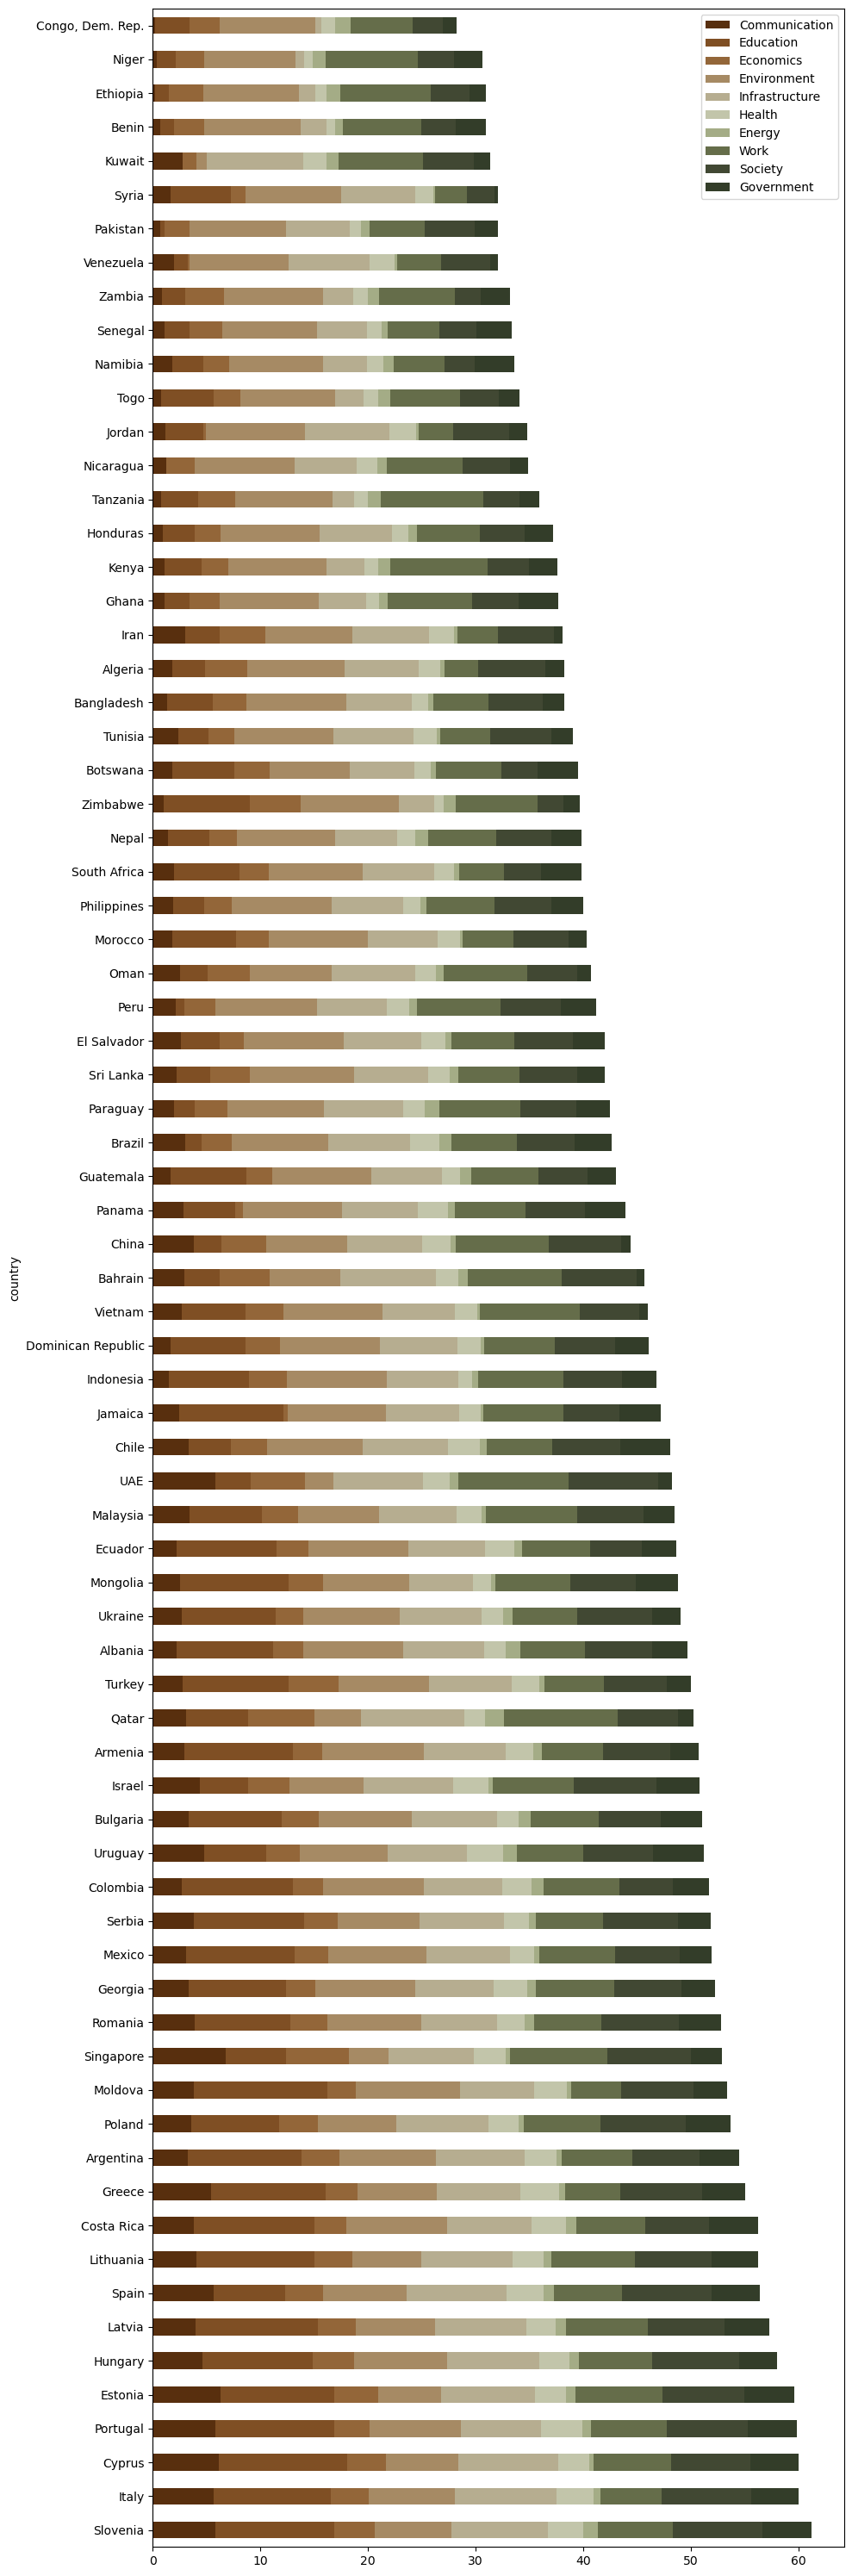

In [94]:
index_plot(df_young)

In [95]:
df_couple = create_df_from_csv("INDEX","df_couple").set_index("country")
df_couple_t = create_df_from_csv("INDEX","df_couple_t").set_index("country")

# sort by total:
df_couple = df_couple.join(df_couple_t[["total"]])
df_couple = df_couple.sort_values(by="total",ascending=False)
df_couple

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government,total
country,,,,,,,,,,,
Slovenia,5.790,3.690,5.655,10.665,9.01,6.57,1.355,4.64,8.30,4.560,60.235
Italy,5.685,3.625,5.310,11.940,9.43,7.01,0.595,3.82,8.31,4.390,60.115
Portugal,5.850,3.665,4.965,12.735,7.45,7.62,0.830,4.68,7.52,4.595,59.910
Spain,5.685,2.195,5.310,11.715,9.22,6.99,0.980,4.20,8.34,4.500,59.135
Hungary,4.620,3.425,5.775,12.885,8.55,5.65,0.860,4.57,8.10,3.480,57.915
...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,0.225,0.415,4.800,13.350,1.50,2.08,1.320,5.61,3.57,1.510,34.380
Syria,1.680,1.865,1.965,13.380,6.89,3.41,0.135,1.95,2.62,0.265,34.160
Niger,0.390,0.585,3.975,12.735,0.78,1.62,1.185,5.71,3.36,2.625,32.965


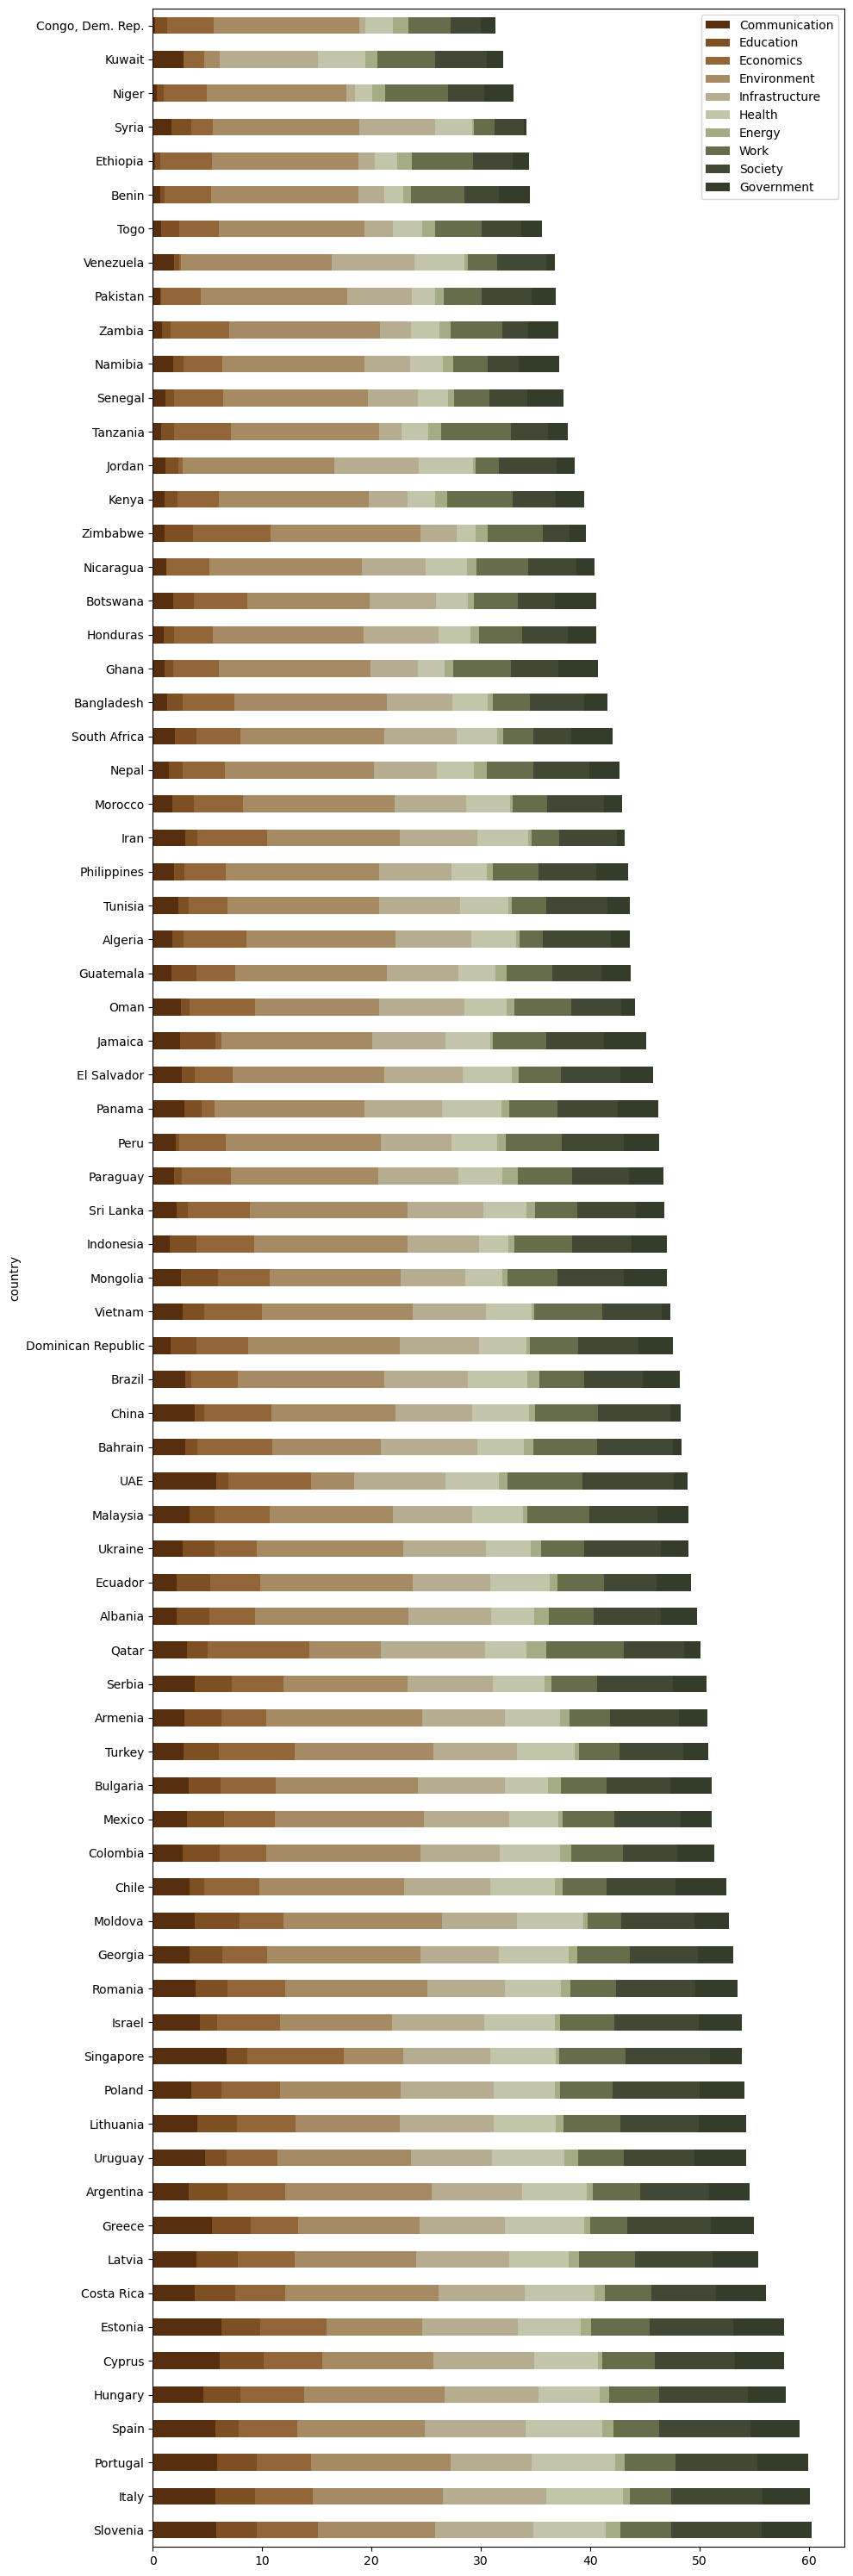

In [96]:
index_plot(df_couple)

In [97]:
df_pension = create_df_from_csv("INDEX","df_pension").set_index("country")
df_pension_t = create_df_from_csv("INDEX","df_pension_t").set_index("country")

# sort by total:
df_pension = df_pension.join(df_pension_t[["total"]])
df_pension = df_pension.sort_values(by="total",ascending=False)
df_pension

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government,total
country,,,,,,,,,,,
Slovenia,1.930,3.690,3.77,10.665,9.01,9.855,2.71,2.320,12.450,9.12,65.520
Italy,1.895,3.625,3.54,11.940,9.43,10.515,1.19,1.910,12.465,8.78,65.290
Portugal,1.950,3.665,3.31,12.735,7.45,11.430,1.66,2.340,11.280,9.19,65.010
Spain,1.895,2.195,3.54,11.715,9.22,10.485,1.96,2.100,12.510,9.00,64.620
Hungary,1.540,3.425,3.85,12.885,8.55,8.475,1.72,2.285,12.150,6.96,61.840
...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,0.075,0.415,3.20,13.350,1.50,3.120,2.64,2.805,5.355,3.02,35.480
Syria,0.560,1.865,1.31,13.380,6.89,5.115,0.27,0.975,3.930,0.53,34.825
Niger,0.130,0.585,2.65,12.735,0.78,2.430,2.37,2.855,5.040,5.25,34.825


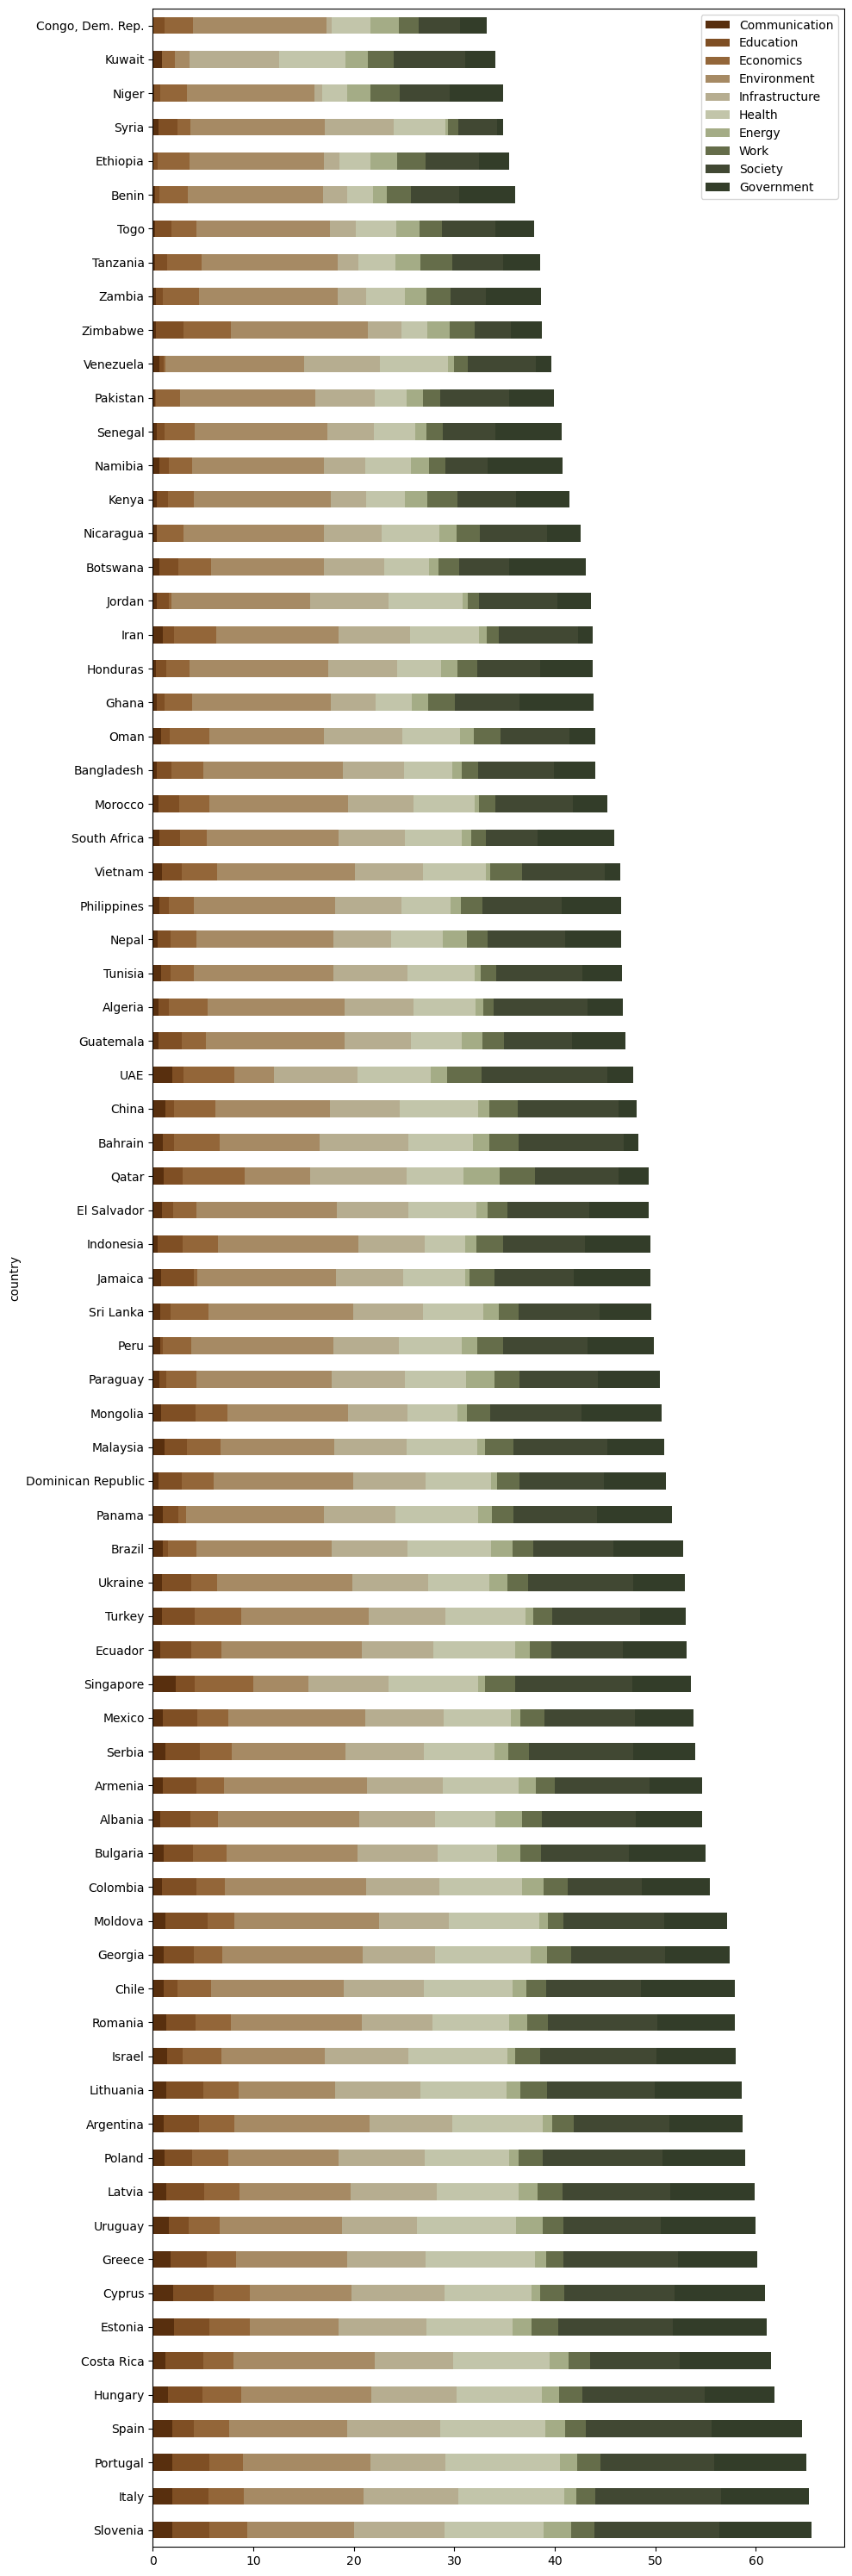

In [98]:
index_plot(df_pension)